In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:

df = pd.read_csv('../data/interim/WaterUpdated.csv')
df.head()

,id,amount_tsh,gps_height,installer,basin,region,lga,ward,population,public_meeting,permit,extraction_type,management,payment,water_quality,quantity,source,waterpoint_type,time_passed,target
0,69572,6000.0,1390,Roman,Lake Nyasa,Iringa,Ludewa,Mundindi,109.0,1,0,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,12,functional
1,8776,0.0,1399,GRUMETI,Lake Victoria,Mara,Serengeti,Natta,280.0,0,1,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,3,functional
2,34310,25.0,686,World vision,Pangani,Manyara,Simanjiro,Ngorika,250.0,1,1,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,4,functional
3,67743,0.0,263,UNICEF,Ruvuma / Southern Coast,Mtwara,Nanyumbu,Nanyumbu,58.0,1,1,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,27,non functional
4,19728,0.0,0,Artisan,Lake Victoria,Kagera,Karagwe,Nyakasimbi,320.0,1,1,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,11,functional


In [4]:
df.describe()

,id,amount_tsh,gps_height,population,public_meeting,permit,time_passed
count,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,264.311431,0.858771,0.654074,13.996465
std,21453.128371,2997.574558,693.116350,456.723285,0.348261,0.475673,10.260706
min,0.000000,0.000000,-90.000000,1.000000,0.000000,0.000000,-7.000000
25%,18519.750000,0.000000,0.000000,63.000000,1.000000,0.000000,8.000000
50%,37061.500000,0.000000,369.000000,200.000000,1.000000,1.000000,11.000000
75%,55656.500000,20.000000,1319.250000,320.000000,1.000000,1.000000,16.000000
max,74247.000000,350000.000000,2770.000000,30500.000000,1.000000,1.000000,53.000000


In [82]:
df.loc[df.time_passed < 0]

,id,amount_tsh,gps_height,installer,basin,region,lga,ward,population,public_meeting,permit,extraction_type,management,payment,water_quality,quantity,source,waterpoint_type,time_passed,target
8729,20198,0.0,86,DWE,Pangani,Tanga,Muheza,Ngomeni,120.0,1,1,india mark ii,vwc,never pay,salty abandoned,dry,shallow well,hand pump,-4,non functional
10441,55069,20.0,307,DDCA,Rufiji,Pwani,Kisarawe,Msanga,1.0,1,0,india mark iii,vwc,pay per bucket,soft,enough,spring,hand pump,-2,non functional
13366,48759,100.0,1331,Mgaya,Lake Victoria,Mara,Serengeti,Kenyamonta,80.0,0,1,other - rope pump,other,pay per bucket,soft,enough,shallow well,hand pump,-7,functional
23373,20534,50.0,239,TASAFcitizen and LGA,Ruvuma / Southern Coast,Mtwara,Newala,Luchingu,317.0,1,0,gravity,vwc,pay per bucket,soft,enough,spring,communal standpipe multiple,-5,functional
27501,53086,500.0,1611,Villagers,Rufiji,Iringa,Njombe,Makambako,65.0,1,0,nira/tanira,vwc,pay when scheme fails,soft,enough,hand dtw,hand pump,-5,functional
32619,9195,0.0,1856,Cultus,Lake Tanganyika,Rukwa,Sumbawanga Urban,Kasense,900.0,1,1,gravity,vwc,never pay,soft,dry,spring,communal standpipe,-1,non functional
33942,5971,0.0,-27,AMREF,Rufiji,Pwani,Mkuranga,Magawa,200.0,1,0,swn 80,vwc,never pay,soft,seasonal,shallow well,hand pump,-3,non functional
39559,15921,0.0,301,DWE,Pangani,Tanga,Korogwe,Kwagunda,713.0,1,0,other,vwc,never pay,soft,dry,shallow well,other,-5,non functional
48555,1251,0.0,284,Karugendo,Wami / Ruvu,Pwani,Kisarawe,Kibuta,185.0,1,0,gravity,private operator,never pay,soft,enough,rainwater harvesting,communal standpipe,-4,functional


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               59400 non-null  int64  
 1   amount_tsh       59400 non-null  float64
 2   gps_height       59400 non-null  int64  
 3   installer        55745 non-null  object 
 4   basin            59400 non-null  object 
 5   region           59400 non-null  object 
 6   lga              59400 non-null  object 
 7   ward             59400 non-null  object 
 8   population       59400 non-null  float64
 9   public_meeting   59400 non-null  int64  
 10  permit           59400 non-null  int64  
 11  extraction_type  59400 non-null  object 
 12  management       59400 non-null  object 
 13  payment          59400 non-null  object 
 14  water_quality    59400 non-null  object 
 15  quantity         59400 non-null  object 
 16  source           59400 non-null  object 
 17  waterpoint_t

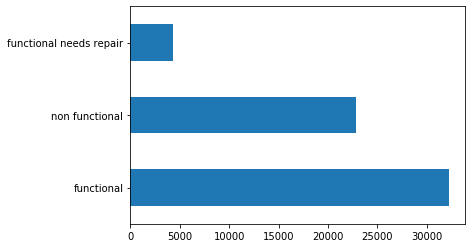

In [19]:
# visualizing the target variable
# some class imbalance, especially the functional needs repair category is under-represented
df.target.value_counts().plot.barh();

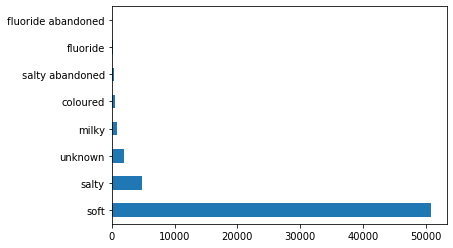

In [28]:
# Most water quality is 'soft'
df.water_quality.value_counts().plot.barh();

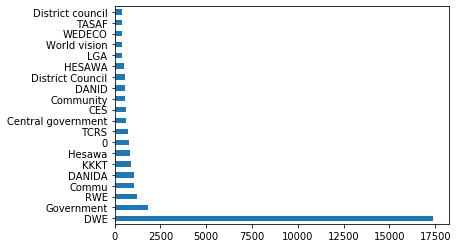

In [27]:
# One installer DWE accounts for about a third of observations
df.installer.value_counts().head(20).plot.barh();

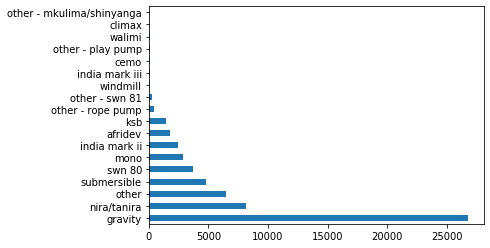

In [34]:
# most extraction type(around half) are of type 'gravity', 'other' is a substantial column here
df.extraction_type.value_counts().plot.barh();

In [35]:
#closer look at extraction_type
df.extraction_type.value_counts().cumsum()

gravity                      26780
nira/tanira                  34934
other                        41364
submersible                  46128
swn 80                       49798
mono                         52663
india mark ii                55063
afridev                      56833
ksb                          58248
other - rope pump            58699
other - swn 81               58928
windmill                     59045
india mark iii               59143
cemo                         59233
other - play pump            59318
walimi                       59366
climax                       59398
other - mkulima/shinyanga    59400
Name: extraction_type, dtype: int64

In [36]:
df.columns

Index(['id', 'amount_tsh', 'gps_height', 'installer', 'basin', 'region', 'lga',
       'ward', 'population', 'public_meeting', 'permit', 'extraction_type',
       'management', 'payment', 'water_quality', 'quantity', 'source',
       'waterpoint_type', 'time_passed', 'target'],
      dtype='object')

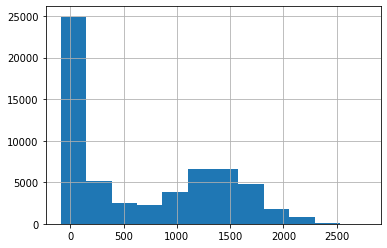

In [43]:
# altitude distributions -- many are around zero
df.gps_height.hist(bins=12);

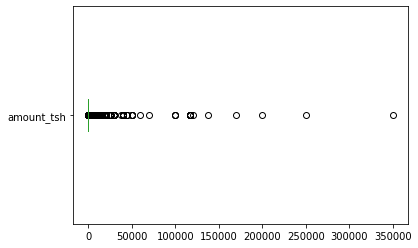

In [52]:
# amount tsh (total static head -- amount water available to waterpoint)
# couple huge outliers here
df.amount_tsh.plot.box(vert=False)

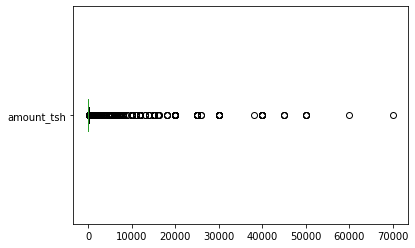

In [56]:
# Still big outliers, looks like most points are below 10k
df.loc[df.amount_tsh < 100000, 'amount_tsh'].plot.box(vert=False)

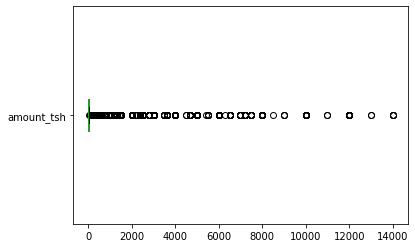

In [57]:
df.loc[df.amount_tsh < 15000, 'amount_tsh'].plot.box(vert=False)

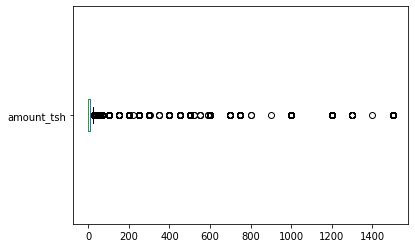

In [58]:
df.loc[df.amount_tsh < 2000, 'amount_tsh'].plot.box(vert=False)

In [60]:
# Almost all entries are less than 15k
len(df.loc[df.amount_tsh < 15000, 'amount_tsh'])/len(df)

0.9979629629629629

In [61]:
# ditto 5k
len(df.loc[df.amount_tsh < 5000, 'amount_tsh'])/len(df)

0.9845117845117846

In [62]:
# ...and 2k
len(df.loc[df.amount_tsh < 2000, 'amount_tsh'])/len(df)

0.9576599326599327

In [79]:
# 70 percent of values are zero. Max value is ~350000.. what's up with that? data issue or just 
# really small water values?
len(df.loc[df.amount_tsh == 0, 'amount_tsh'])/len(df)

0.700993265993266